## Лабораторная работа 2. Python. Кластерный анализ.

## Группа: РИМ-211060

### ФИО студентов:
#### Степаненко Дмитрий Владимирович
#### Стойчин Красимир Людмилов

## 0. Цель работы: изучить основы кластерного анализа на примерах визуализации с помощью нового пакета на Python - Clustergram (генерации кластерограмм из решений кластеризации).

### Теория:
Когда мы хотим провести кластерный анализ для выявления групп в наших данных, мы часто используем алгоритмы типа метода k-средних, которые требуют задания количества кластеров. Но проблема в том, что мы обычно не знаем, сколько кластеров существует.

Существует множество методов определения правильного числа, например силуэты или локтевой сгиб. Но они обычно не дают представления о том, что происходит между различными вариантами, поэтому цифры немного абстрактны.

clustergram в настоящее время поддерживает метод k-средних, использование scikit-learn (включая реализацию Mini-Batch) и RAPIDS.AI cuML (если у вас есть GPU с поддержкой CUDA), Gaussian Mixture Model (только scikit-learn) и иерархическую кластеризацию на основе scipy.hierarchy. В качестве альтернативы мы можем создать кластерограмму на основе меток и данных, полученных с помощью альтернативных пользовательских алгоритмов кластеризации. Пакет предоставляет API, подобный sklearn, и строит кластерные диаграммы с помощью matplotlib, что даёт ему широкий выбор вариантов оформления в соответствии со стилем вашей публикации.

Установить clustergram: conda install clustergram -c conda-forge или pip install clustergram (и другие библиотеки, по необходимости, например urbangrammar-graphics)

In [11]:
#pip install clustergram
#pip install urbangrammar-graphics

## 1. Сначала импортируем в свой код нужные библиотеки, функции и т.д.

In [4]:
from clustergram import Clustergram
import urbangrammar_graphics as ugg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

sns.set(style='whitegrid')

## 2. Рассмотрим набор данных о цветке ириса. Он содержит данные по трём видам цветков ириса с измерением ширины и длины чашелистиков, а также и ширины и длины лепестков.

Text(0.5, 1.01, 'Iris flowers')

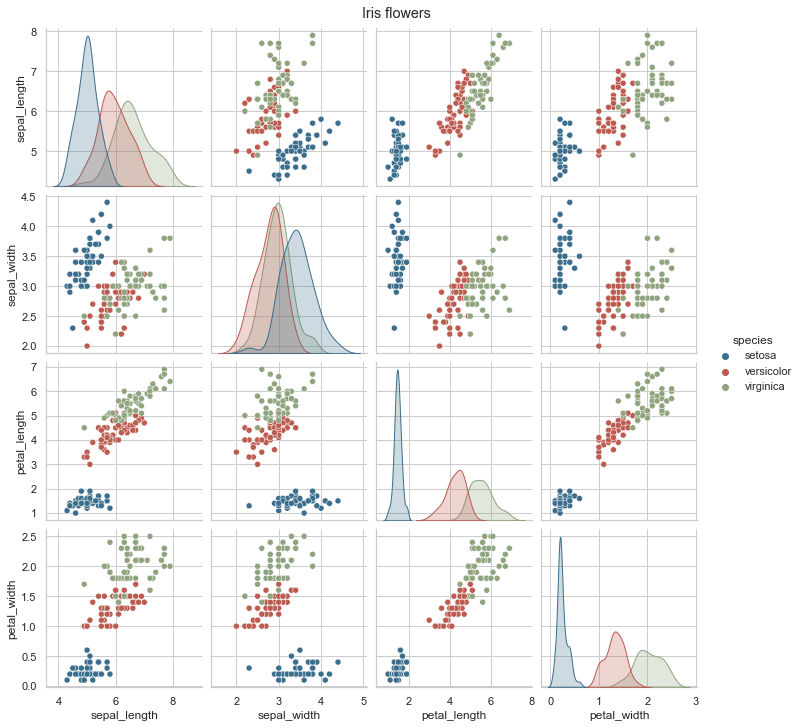

In [5]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette=ugg.COLORS[1:4])
g.fig.suptitle("Iris flowers", y=1.01)

#### setosa — относительно чётко определённая группа, тогда как разница между versicolor и virginica меньше, поскольку они частично перекрываются (или, в случае ширины чашелистика, полностью).

Теперь известно, как выглядят данные. И можно увидеть кластерограмму (существует три кластера, и в идеале необходимо распознать это по кластерограмме).

## 3. Рассмотрим кластеризацию методом k-средних. Чтобы получить стабильный результат, необходимо запустить кластерную программу с 1000 инициализаций.

K=1 skipped. Mean computed from data directly.
K=2 fitted in 1.5830433368682861 seconds.
K=3 fitted in 2.4283995628356934 seconds.
K=4 fitted in 3.4726579189300537 seconds.
K=5 fitted in 3.8279945850372314 seconds.
K=6 fitted in 4.297099351882935 seconds.
K=7 fitted in 4.304203748703003 seconds.
K=8 fitted in 4.815009593963623 seconds.
K=9 fitted in 4.926504850387573 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

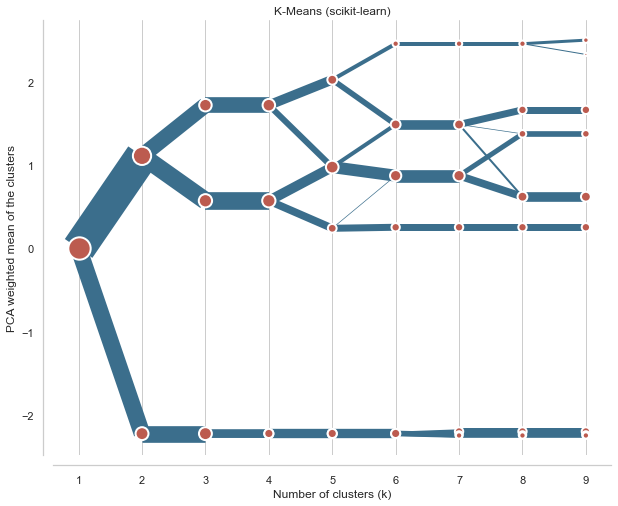

In [8]:
data = scale(iris.drop(columns=['species']))

cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(data)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

На оси Х - количество кластеров. Точки представляют собой центр каждого кластера (по умолчанию), взвешенный по первой главной компоненте (это помогает сделать диаграмму более читабельной). Линии, соединяющие точки, и их толщина представляют наблюдения, перемещающиеся между кластерами. Следовательно, можно увидеть, когда новые кластеры образуются как расщепление одного существующего класса и когда они образуются на основе наблюдений из двух кластеров.

Необходимо найти разделение, т. е. ответить на вопрос, принёс ли дополнительный кластер какое-либо значимое разделение? Шаг от одного кластера к двум большой — хорошее и чёткое разделение. От двух до трёх — свидетельство довольно хорошего раскола в верхней ветви. Но с 3 по 4 видимой разницы нет, потому что новый четвёртый кластер почти не отличается от существующей нижней ветви. Хотя сейчас она разделена на две части, это разделение не даёт много информации. Таким образом, можно сделать вывод, что идеальное количество кластеров для данных Iris — три.

## 4. Дополнительно - оценка силуэта или оценку Калинского — Харабазса:

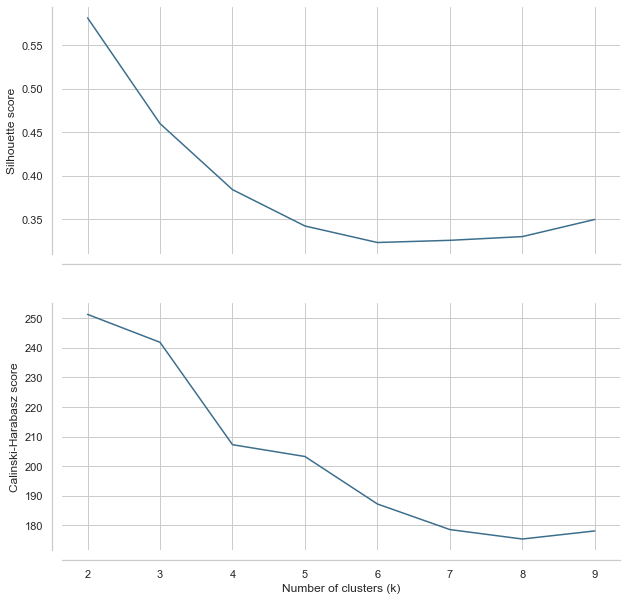

In [9]:
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(
    xlabel="Number of clusters (k)",
    ylabel="Silhouette score",
    color=ugg.COLORS[1],
    ax=axs[0],
)
cgram.calinski_harabasz_score().plot(
    xlabel="Number of clusters (k)",
    ylabel="Calinski-Harabasz score",
    color=ugg.COLORS[1],
    ax=axs[1],
)
sns.despine(offset=10)

#### По этим графикам можно предположить наличие 3–4 кластеров по аналогии с кластерограммой, но они не очень убедительны.

## 5. Пример кластерной диаграммы в наборе данных Palmer penguins:

In [12]:
import seaborn
df = seaborn.load_dataset('penguins')

#### Сначала мы должны выбрать числовые данные и масштабировать их.

In [13]:
from sklearn.preprocessing import scale
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

#### И тогда мы можем просто передать данные в clustergram.

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.03637409210205078 seconds.
K=3 fitted in 0.04817390441894531 seconds.
K=4 fitted in 0.05273938179016113 seconds.
K=5 fitted in 0.05780959129333496 seconds.
K=6 fitted in 0.06951498985290527 seconds.
K=7 fitted in 0.10559225082397461 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

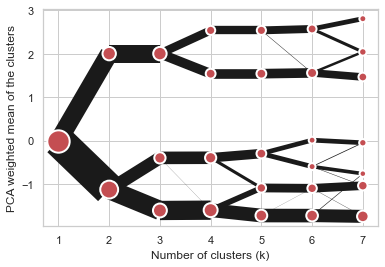

In [14]:
from clustergram import Clustergram

cgram = Clustergram(range(1, 8))
cgram.fit(data)
cgram.plot()

#### Результат очень похож, хотя разница между третьим и четвёртым разделениями более выражена. Вероятно, необходимо выбрать решение с четырьмя кластерами. Подобная ситуация случается очень часто. Идеального случая не существует.

### Выводы:

Таким образом, необходимо принять решение об оптимальном количестве кластеров. Clustergam даёт дополнительные сведения о том, что происходит между различными вариантами, как они расходятся. Можно сказать, что вариант с четырьмя кластерами в данных Iris не помогает. Кластерограмма не даёт простого ответа, но она даёт лучшее понимание, кроме того, многое зависит и от её дальнейшей интерпретации.